In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

### Here a slightly different preprocessing is done in order to engineer features and obtain more visualizations

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/Carol-Kelly/Hamoye-Data-Warehouse-ProjectTeam/main/original_earnings%20dataset.csv",
                 delimiter=',', index_col=0)
df.head()

,year,females,female managers,female professionals,female technicians and trades workers,female community and personal service workers,female clerical and administrative workers,female sales workers,female machinery operators and drivers,female labourers,...,male labourers,persons,person managers,person professionals,person technicians and trades workers,person community and personal service workers,person clerical and administrative workers,person sales workers,person machinery operators and drivers,person labourers
0,2004,Females,26.14,29.02,17.90,18.01,19.98,14.79,16.27,16.48,...,17.21,Persons,30.60,31.22,21.58,19.03,20.80,16.13,20.39,16.95
1,2005,Females,28.10,30.00,18.86,18.20,20.95,15.39,21.49,16.71,...,17.85,Persons,31.37,31.91,21.42,19.60,21.71,16.70,21.09,17.44
2,2006,Females,28.60,30.56,19.64,18.84,21.73,16.19,17.37,16.32,...,18.18,Persons,32.82,32.28,22.18,20.04,22.82,17.57,21.00,17.48
3,2007,Females,36.43,31.93,20.98,19.85,23.27,16.78,18.04,17.54,...,19.68,Persons,37.95,35.01,23.52,21.32,24.61,18.28,22.55,18.88
4,2008,Females,32.68,32.93,20.30,20.97,23.67,17.44,20.27,17.27,...,19.79,Persons,36.24,35.84,24.19,24.25,24.76,19.34,23.33,18.85


In [3]:
df.shape

(14, 28)

In [4]:
df_clean = df.copy()

In [5]:
# Separate the dataset into male_df, female_df and person_df
df_clean.set_index('year', inplace=True)
total_category = df_clean.T
total_category

year,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
females,Females,Females,Females,Females,Females,Females,Females,Females,Females,Females,Females,Females,Females,Females
female managers,26.14,28.1,28.6,36.43,32.68,33.3,34.41,35.22,36.24,37.26,42.63,42.12,44.35,46.02
female professionals,29.02,30.0,30.56,31.93,32.93,34.72,35.52,36.48,37.72,38.95,44.13,44.75,45.17,47.04
female technicians and trades workers,17.9,18.86,19.64,20.98,20.3,20.19,22.86,23.19,23.95,23.9,27.86,27.5,26.28,28.3
female community and personal service workers,18.01,18.2,18.84,19.85,20.97,21.0,21.97,23.25,23.52,24.5,25.01,26.87,26.54,27.84
female clerical and administrative workers,19.98,20.95,21.73,23.27,23.67,23.81,25.74,26.85,28.35,28.38,31.52,31.68,32.35,33.54
female sales workers,14.79,15.39,16.19,16.78,17.44,18.02,19.15,19.87,20.82,21.61,22.28,22.99,23.39,26.11
female machinery operators and drivers,16.27,21.49,17.37,18.04,20.27,21.46,22.74,22.92,24.46,25.02,29.84,31.91,29.73,30.07
female labourers,16.48,16.71,16.32,17.54,17.27,17.9,19.18,19.82,20.99,21.75,22.64,23.66,24.19,24.9
males,Males,Males,Males,Males,Males,Males,Males,Males,Males,Males,Males,Males,Males,Males


In [6]:
#Extract the male features only from the datasets
df_males = total_category[9:18]
df_males

year,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
males,Males,Males,Males,Males,Males,Males,Males,Males,Males,Males,Males,Males,Males,Males
male managers,33.02,33.13,35.16,38.85,38.34,41.67,41.28,43.87,44.24,44.85,49.55,49.02,49.77,52.51
male professionals,34.03,34.2,34.34,38.85,39.4,40.12,41.49,45.78,45.24,45.03,50.45,51.05,49.49,52.91
male technicians and trades workers,22.15,21.87,22.64,23.97,24.81,26.62,27.95,29.26,30.94,30.82,31.95,33.27,31.97,34.25
male community and personal service workers,21.18,22.52,22.74,24.56,31.35,25.1,26.99,26.41,29.03,29.2,31.96,30.74,33.35,32.63
male clerical and administrative workers,23.19,23.94,26.15,28.52,28.04,28.25,30.69,32.77,32.9,33.88,35.85,35.72,37.77,39.4
male sales workers,18.51,19.01,19.99,20.82,22.58,21.6,23.22,23.99,24.49,24.55,25.99,26.89,29.62,29.28
male machinery operators and drivers,20.92,21.04,21.36,23.06,23.7,25.44,27.25,27.16,28.88,29.83,30.48,30.92,29.65,33.12
male labourers,17.21,17.85,18.18,19.68,19.79,19.96,21.69,22.16,24.18,24.25,25.22,24.73,25.64,27.28


In [7]:
males_df = df_males.T
males_df.reset_index(inplace = True)
males_df.head()

,year,males,male managers,male professionals,male technicians and trades workers,male community and personal service workers,male clerical and administrative workers,male sales workers,male machinery operators and drivers,male labourers
0,2004,Males,33.02,34.03,22.15,21.18,23.19,18.51,20.92,17.21
1,2005,Males,33.13,34.2,21.87,22.52,23.94,19.01,21.04,17.85
2,2006,Males,35.16,34.34,22.64,22.74,26.15,19.99,21.36,18.18
3,2007,Males,38.85,38.85,23.97,24.56,28.52,20.82,23.06,19.68
4,2008,Males,38.34,39.4,24.81,31.35,28.04,22.58,23.7,19.79


In [8]:
males_df.rename(columns ={ 'males':'gender'}, inplace=True)

In [9]:
columns_list = []
for column in males_df.columns:
    if 'male' not in column:
        columns_list.append(column)
    else:
        new = column.replace('male', '')
        columns_list.append(new)
print(columns_list)

['year', 'gender', ' managers', ' professionals', ' technicians and trades workers', ' community and personal service workers', ' clerical and administrative workers', ' sales workers', ' machinery operators and drivers', ' labourers']


In [10]:
males_df.columns = columns_list
males_df.head()

,year,gender,managers,professionals,technicians and trades workers,community and personal service workers,clerical and administrative workers,sales workers,machinery operators and drivers,labourers
0,2004,Males,33.02,34.03,22.15,21.18,23.19,18.51,20.92,17.21
1,2005,Males,33.13,34.2,21.87,22.52,23.94,19.01,21.04,17.85
2,2006,Males,35.16,34.34,22.64,22.74,26.15,19.99,21.36,18.18
3,2007,Males,38.85,38.85,23.97,24.56,28.52,20.82,23.06,19.68
4,2008,Males,38.34,39.4,24.81,31.35,28.04,22.58,23.7,19.79


In [11]:
#Extract the females features only from the datasets
df_females = total_category[0:9]
#df_females=df_females.drop('females', axis=0)
df_females

year,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
females,Females,Females,Females,Females,Females,Females,Females,Females,Females,Females,Females,Females,Females,Females
female managers,26.14,28.1,28.6,36.43,32.68,33.3,34.41,35.22,36.24,37.26,42.63,42.12,44.35,46.02
female professionals,29.02,30.0,30.56,31.93,32.93,34.72,35.52,36.48,37.72,38.95,44.13,44.75,45.17,47.04
female technicians and trades workers,17.9,18.86,19.64,20.98,20.3,20.19,22.86,23.19,23.95,23.9,27.86,27.5,26.28,28.3
female community and personal service workers,18.01,18.2,18.84,19.85,20.97,21.0,21.97,23.25,23.52,24.5,25.01,26.87,26.54,27.84
female clerical and administrative workers,19.98,20.95,21.73,23.27,23.67,23.81,25.74,26.85,28.35,28.38,31.52,31.68,32.35,33.54
female sales workers,14.79,15.39,16.19,16.78,17.44,18.02,19.15,19.87,20.82,21.61,22.28,22.99,23.39,26.11
female machinery operators and drivers,16.27,21.49,17.37,18.04,20.27,21.46,22.74,22.92,24.46,25.02,29.84,31.91,29.73,30.07
female labourers,16.48,16.71,16.32,17.54,17.27,17.9,19.18,19.82,20.99,21.75,22.64,23.66,24.19,24.9


In [12]:
females_df = df_females.T
females_df.reset_index(inplace = True)
females_df.head()

,year,females,female managers,female professionals,female technicians and trades workers,female community and personal service workers,female clerical and administrative workers,female sales workers,female machinery operators and drivers,female labourers
0,2004,Females,26.14,29.02,17.9,18.01,19.98,14.79,16.27,16.48
1,2005,Females,28.1,30.0,18.86,18.2,20.95,15.39,21.49,16.71
2,2006,Females,28.6,30.56,19.64,18.84,21.73,16.19,17.37,16.32
3,2007,Females,36.43,31.93,20.98,19.85,23.27,16.78,18.04,17.54
4,2008,Females,32.68,32.93,20.3,20.97,23.67,17.44,20.27,17.27


In [13]:
females_df.columns = columns_list

In [14]:
females_df.head()

,year,gender,managers,professionals,technicians and trades workers,community and personal service workers,clerical and administrative workers,sales workers,machinery operators and drivers,labourers
0,2004,Females,26.14,29.02,17.9,18.01,19.98,14.79,16.27,16.48
1,2005,Females,28.1,30.0,18.86,18.2,20.95,15.39,21.49,16.71
2,2006,Females,28.6,30.56,19.64,18.84,21.73,16.19,17.37,16.32
3,2007,Females,36.43,31.93,20.98,19.85,23.27,16.78,18.04,17.54
4,2008,Females,32.68,32.93,20.3,20.97,23.67,17.44,20.27,17.27


In [15]:
#Extract the persons features only from the datasets
df_persons = total_category[18:]
#df_persons=df_persons.drop('persons', axis=0)
df_persons

year,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
persons,Persons,Persons,Persons,Persons,Persons,Persons,Persons,Persons,Persons,Persons,Persons,Persons,Persons,Persons
person managers,30.6,31.37,32.82,37.95,36.24,38.57,38.73,40.62,41.28,41.99,46.88,46.21,47.66,49.8
person professionals,31.22,31.91,32.28,35.01,35.84,37.1,38.14,40.65,41.07,41.66,46.92,47.53,47.03,49.56
person technicians and trades workers,21.58,21.42,22.18,23.52,24.19,25.68,27.23,28.42,29.9,29.81,31.34,32.39,31.04,33.36
person community and personal service workers,19.03,19.6,20.04,21.32,24.25,22.25,23.5,24.26,25.25,25.88,27.16,28.11,28.68,29.28
person clerical and administrative workers,20.8,21.71,22.82,24.61,24.76,24.93,27.04,28.31,29.47,29.84,32.56,32.69,33.76,35.01
person sales workers,16.13,16.7,17.57,18.28,19.34,19.38,20.58,21.41,22.16,22.67,23.59,24.38,25.79,27.31
person machinery operators and drivers,20.39,21.09,21.0,22.55,23.33,25.05,26.82,26.74,28.52,29.36,30.42,31.02,29.66,32.84
person labourers,16.95,17.44,17.48,18.88,18.85,19.21,20.83,21.32,22.99,23.32,24.29,24.36,25.14,26.44


In [16]:
persons_df = df_persons.T
persons_df.reset_index(inplace = True)
persons_df.head()

,year,persons,person managers,person professionals,person technicians and trades workers,person community and personal service workers,person clerical and administrative workers,person sales workers,person machinery operators and drivers,person labourers
0,2004,Persons,30.6,31.22,21.58,19.03,20.8,16.13,20.39,16.95
1,2005,Persons,31.37,31.91,21.42,19.6,21.71,16.7,21.09,17.44
2,2006,Persons,32.82,32.28,22.18,20.04,22.82,17.57,21.0,17.48
3,2007,Persons,37.95,35.01,23.52,21.32,24.61,18.28,22.55,18.88
4,2008,Persons,36.24,35.84,24.19,24.25,24.76,19.34,23.33,18.85


In [17]:
persons_df.columns = columns_list
persons_df.head()

,year,gender,managers,professionals,technicians and trades workers,community and personal service workers,clerical and administrative workers,sales workers,machinery operators and drivers,labourers
0,2004,Persons,30.6,31.22,21.58,19.03,20.8,16.13,20.39,16.95
1,2005,Persons,31.37,31.91,21.42,19.6,21.71,16.7,21.09,17.44
2,2006,Persons,32.82,32.28,22.18,20.04,22.82,17.57,21.0,17.48
3,2007,Persons,37.95,35.01,23.52,21.32,24.61,18.28,22.55,18.88
4,2008,Persons,36.24,35.84,24.19,24.25,24.76,19.34,23.33,18.85


In [18]:
# concatenate the dataframes to one
df_clean = pd.concat([males_df, females_df, persons_df], axis =0)
df_clean.shape

(42, 10)

In [19]:
df_clean.columns

Index(['year', 'gender', ' managers', ' professionals',
       ' technicians and trades workers',
       ' community and personal service workers',
       ' clerical and administrative workers', ' sales workers',
       ' machinery operators and drivers', ' labourers'],
      dtype='object')

In [20]:
df_clean = df_clean.melt(id_vars=['year', 'gender'], var_name= 'job_type', value_name='earning_per_hour')
                         
df_clean.shape

(336, 4)

In [21]:
df_clean

,year,gender,job_type,earning_per_hour
0,2004,Males,managers,33.02
1,2005,Males,managers,33.13
2,2006,Males,managers,35.16
3,2007,Males,managers,38.85
4,2008,Males,managers,38.34
...,...,...,...,...
331,2013,Persons,labourers,23.32
332,2014,Persons,labourers,24.29
333,2015,Persons,labourers,24.36
334,2016,Persons,labourers,25.14


In [22]:
df_clean.sort_values("year")

,year,gender,job_type,earning_per_hour
0,2004,Males,managers,33.02
224,2004,Females,sales workers,14.79
210,2004,Males,sales workers,18.51
28,2004,Persons,managers,30.6
182,2004,Females,clerical and administrative workers,19.98
...,...,...,...,...
251,2017,Persons,sales workers,27.31
265,2017,Males,machinery operators and drivers,33.12
279,2017,Females,machinery operators and drivers,30.07
307,2017,Males,labourers,27.28


In [23]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336 entries, 0 to 335
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   year              336 non-null    int64 
 1   gender            336 non-null    object
 2   job_type          336 non-null    object
 3   earning_per_hour  336 non-null    object
dtypes: int64(1), object(3)
memory usage: 10.6+ KB


#### More Analysis

In [24]:
total_gender = df_clean.groupby('gender')['earning_per_hour'].mean()
total_gender = total_gender.reset_index()
total_gender.head()

,gender,earning_per_hour
0,Females,26.054375
1,Males,30.590268
2,Persons,28.457143


Text(0.5, 1.0, 'Average Hourly Earnings of the Various Gender')

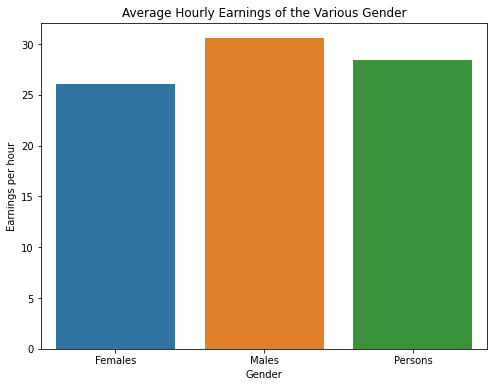

In [25]:
plt.figure(figsize=(8, 6))
sns.barplot(data = total_gender, x= 'gender', y = 'earning_per_hour')
plt.xlabel('Gender')
plt.ylabel('Earnings per hour')
plt.title('Average Hourly Earnings of the Various Gender')

The figure above shows the average houly earning of the eight cadres over the total period of analysis (2004 - 2017) for the various gender. The male gender receives the highest hourly wage of AUD30.59 while the female gender receives the least of AUD26.05.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


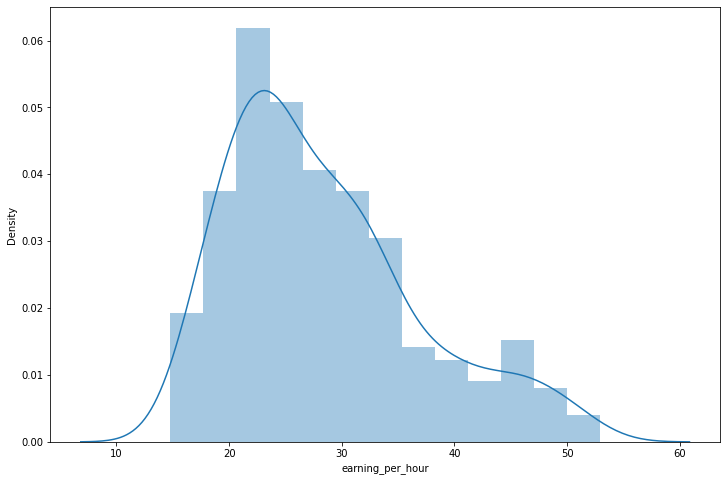

In [26]:
plt.figure(figsize=(12, 8))
sns.distplot(df_clean['earning_per_hour'], kde= True)

From the visualization above, it can be seen that overall, irrespective of cadre, most employees in Australia earn an average hourly wage of about AUD25. 

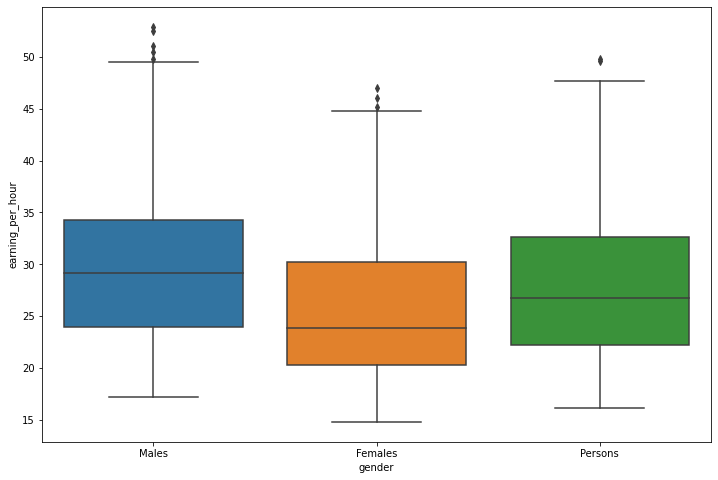

In [27]:
plt.figure(figsize=(12, 8))
sns.boxplot(data= df_clean, y = 'earning_per_hour', x= 'gender')

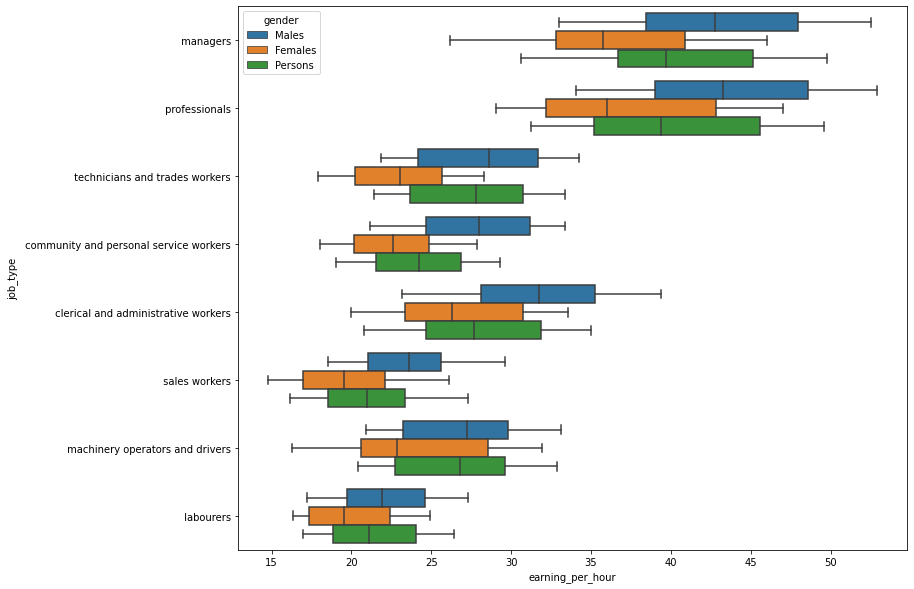

In [28]:
plt.figure(figsize=(12, 10))
sns.boxplot(data= df_clean, x = 'earning_per_hour', y= 'job_type', hue = 'gender')

In the first boxplot where the dataset was divided according to gender, there were outliers; but when the plot was further divided taking into account the various cadres occupied by the gender, there are no more outliers. Signifying that all earnings, regardless of job titles are within range.

### Feature Engineering
Creating our target variable, wage-gap.

In [29]:
df_clean.head()

,year,gender,job_type,earning_per_hour
0,2004,Males,managers,33.02
1,2005,Males,managers,33.13
2,2006,Males,managers,35.16
3,2007,Males,managers,38.85
4,2008,Males,managers,38.34


In [30]:
# Query out male and female data
male_data = df_clean.query('gender == "Males"')
female_data = df_clean.query('gender == "Females"')
print(male_data.shape, female_data.shape)

(112, 4) (112, 4)


In [31]:
# create an average hourly wage in each year for both male and female
male_data = male_data.groupby('year')['earning_per_hour'].mean().round(2)
male_data =male_data.reset_index()
male_data=male_data.rename(columns = {'earning_per_hour':'male_hourly_wage'})
female_data = female_data.groupby('year')['earning_per_hour'].mean().round(2)
female_data = female_data.reset_index()
female_data= female_data.rename(columns = {'earning_per_hour':'female_hourly_wage'})


In [32]:
data = male_data.merge(female_data, on = 'year', how ='outer')
data

,year,male_hourly_wage,female_hourly_wage
0,2004,23.78,19.82
1,2005,24.20,21.21
2,2006,25.07,21.16
3,2007,27.29,23.10
4,2008,28.50,23.19
5,2009,28.60,23.80
6,2010,30.07,25.20
7,2011,31.43,25.95
8,2012,32.49,27.01
9,2013,32.80,27.67


In [33]:
# create the hourly wage gap between male and female
data['wage_gap'] = data.male_hourly_wage - data.female_hourly_wage
data

,year,male_hourly_wage,female_hourly_wage,wage_gap
0,2004,23.78,19.82,3.96
1,2005,24.20,21.21,2.99
2,2006,25.07,21.16,3.91
3,2007,27.29,23.10,4.19
4,2008,28.50,23.19,5.31
5,2009,28.60,23.80,4.80
6,2010,30.07,25.20,4.87
7,2011,31.43,25.95,5.48
8,2012,32.49,27.01,5.48
9,2013,32.80,27.67,5.13


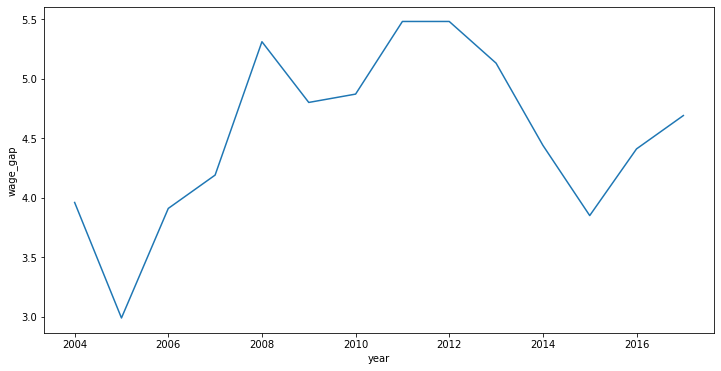

In [34]:
plt.figure(figsize=(12, 6))
sns.lineplot(data =data, x ='year', y ='wage_gap')

In [35]:
data.index = pd.to_datetime(data.index)

<Figure size 864x576 with 0 Axes>

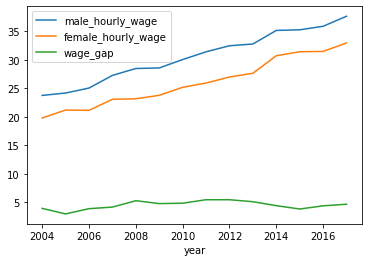

In [36]:
%matplotlib inline 
plt.figure(figsize=(12,8))
data.set_index('year').plot()

We realize the wage gap has been on a steady trend around 5 dollars in hourly wage. We can easily infer that this data doesn't have seasonality. The wage_gap is independent of time.

### Time Series Analysis and Modeling  (The Box - Jenkins Method)

**Using the ARIMA model** 

In [37]:
data.year = data.year.astype('str')
data.year = data.year + '-01-01 00:00:00'
data.head()

,year,male_hourly_wage,female_hourly_wage,wage_gap
1970-01-01 00:00:00.000000000,2004-01-01 00:00:00,23.78,19.82,3.96
1970-01-01 00:00:00.000000001,2005-01-01 00:00:00,24.20,21.21,2.99
1970-01-01 00:00:00.000000002,2006-01-01 00:00:00,25.07,21.16,3.91
1970-01-01 00:00:00.000000003,2007-01-01 00:00:00,27.29,23.10,4.19
1970-01-01 00:00:00.000000004,2008-01-01 00:00:00,28.50,23.19,5.31


In [38]:
data.year = pd.to_datetime(data.year)
data.set_index( "year" , inplace= True)
data.head()

,male_hourly_wage,female_hourly_wage,wage_gap
year,,,
2004-01-01,23.78,19.82,3.96
2005-01-01,24.20,21.21,2.99
2006-01-01,25.07,21.16,3.91
2007-01-01,27.29,23.10,4.19
2008-01-01,28.50,23.19,5.31


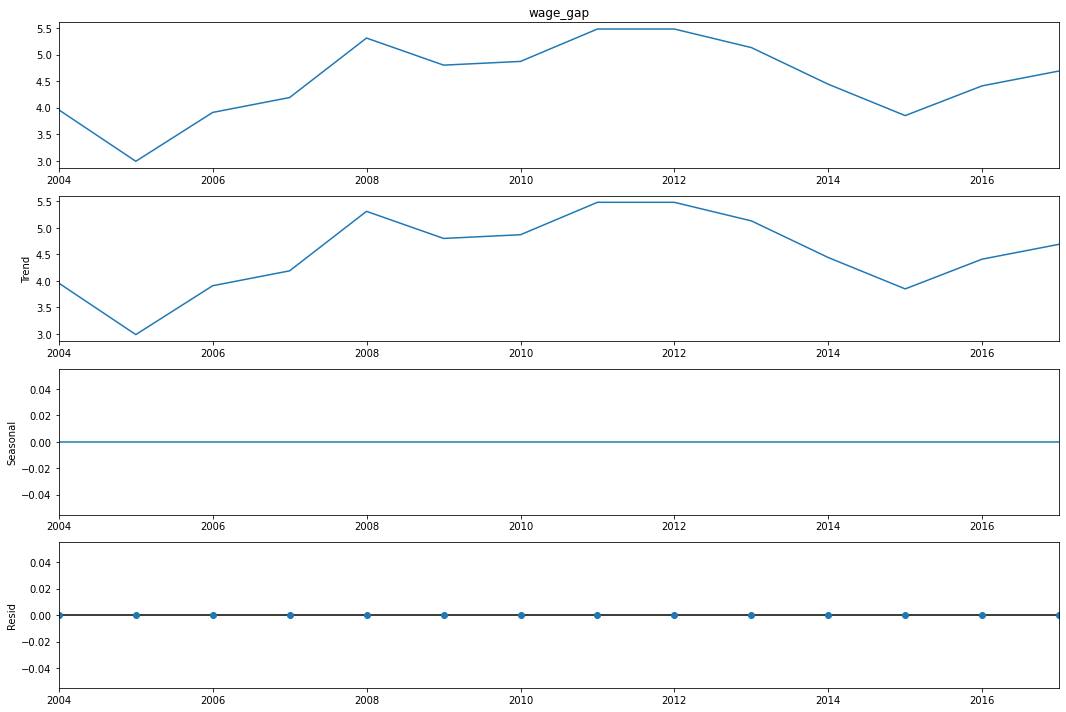

In [39]:
import statsmodels.api as sm
from pylab import rcParams

rcParams[ 'figure.figsize' ] = 15 , 10
decompose_series = sm.tsa.seasonal_decompose(data['wage_gap'], model= 'additive' )
decompose_series.plot()
plt.show()

In [40]:
from statsmodels.tsa.stattools import adfuller

adf_result = adfuller(data.wage_gap)
print(f'ADF Statistic: {adf_result[ 0 ]} ' )
print(f'p-value: {adf_result[ 1 ]} ' )
print(f'No. of lags used: {adf_result[ 2 ]} ' )
print(f'No. of observations used : {adf_result[ 3 ]} ' )
print('Critical Values:' )
for k, v in adf_result[ 4 ].items():
 print( f' {k} : {v} ' )

ADF Statistic: -2.653213421663329 
p-value: 0.08249014458592047 
No. of lags used: 5 
No. of observations used : 8 
Critical Values:
 1% : -4.6651863281249994 
 5% : -3.3671868750000002 
 10% : -2.802960625 


The result shows that the p-value is greater than the critical value (0.05) and the ADF statistic is also greater than the critical value at 5%. Therefore, the series is non-stationary.  

In [41]:
# conducting the first differencing 
data['wage_gap_diff'] = data['wage_gap'] - data['wage_gap'].shift(1)

In [42]:
# test again to ensure stationarity
def adfTest(series):
    result=adfuller(series)
    print('ADF statistic: {}'.format(result[0]))
    print('p-value: {}'.format(result[1]))
    if (result[1] <= 0.05):
        print('We reject the null hypothesis (H0), this data is Stationary')
    else:
        print('We accept the null hypothesis (H0) because the dataset is Non-Stationary')
          
adfTest(data['wage_gap_diff'].dropna())

ADF statistic: -3.9358909488989156
p-value: 0.0017860257653584909
We reject the null hypothesis (H0), this data is Stationary


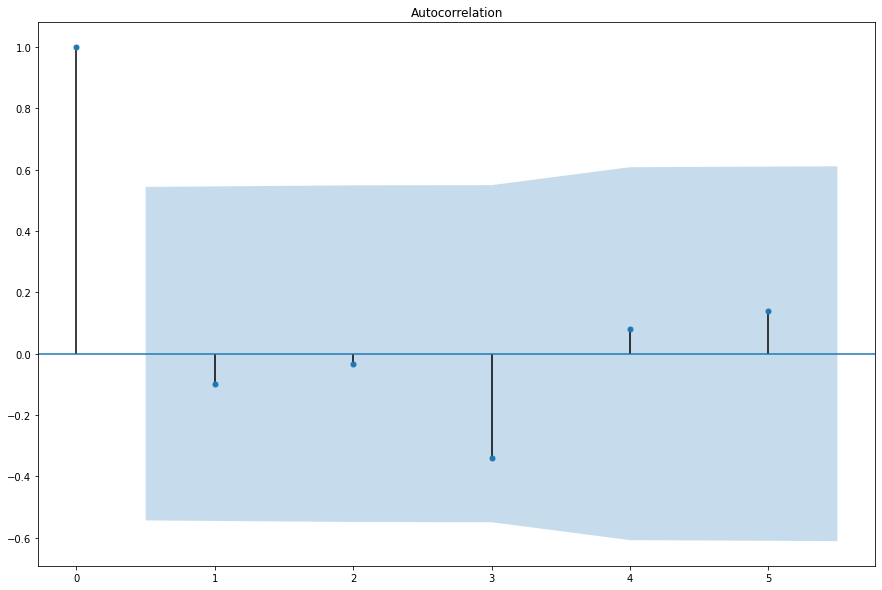

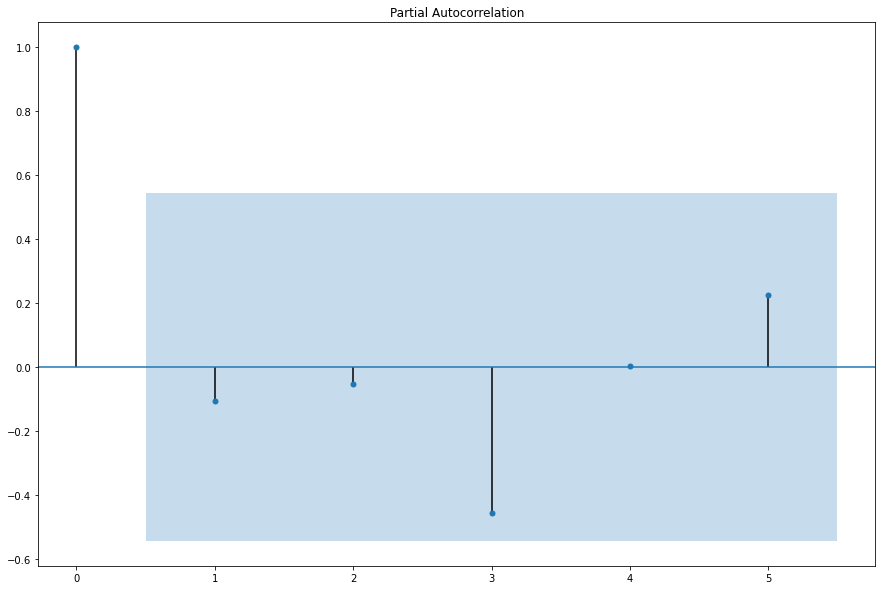

In [43]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import warnings
warnings.filterwarnings("ignore")

#ACF
plot_acf(data['wage_gap_diff'].dropna(), lags=range(0 , 6))
plt.show()
#PACF
plot_pacf(data['wage_gap_diff'].dropna(), lags=range(0 , 6))
plt.show()

In both the ACF and PACF plots, no lag crossed the significant level; hence, q=p=0. Therefore, the ARIMA order is (0,0,0)

In [44]:
# divide the data into train and test sets
test_size = (len(data) - 4)

train_data = data[:test_size]
test_data = data[test_size:]

In [45]:
train_data

,male_hourly_wage,female_hourly_wage,wage_gap,wage_gap_diff
year,,,,
2004-01-01,23.78,19.82,3.96,NaN
2005-01-01,24.20,21.21,2.99,-0.97
2006-01-01,25.07,21.16,3.91,0.92
2007-01-01,27.29,23.10,4.19,0.28
2008-01-01,28.50,23.19,5.31,1.12
2009-01-01,28.60,23.80,4.80,-0.51
2010-01-01,30.07,25.20,4.87,0.07
2011-01-01,31.43,25.95,5.48,0.61
2012-01-01,32.49,27.01,5.48,0.00


In [46]:
test_data

,male_hourly_wage,female_hourly_wage,wage_gap,wage_gap_diff
year,,,,
2014-01-01,35.18,30.74,4.44,-0.69
2015-01-01,35.29,31.44,3.85,-0.59
2016-01-01,35.91,31.50,4.41,0.56
2017-01-01,37.67,32.98,4.69,0.28


In [47]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(train_data['wage_gap'], order=(0,0,0))
fit_model = model.fit()

In [48]:
fit_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               wage_gap   No. Observations:                   10
Model:                          ARIMA   Log Likelihood                 -11.711
Date:                Tue, 25 Oct 2022   AIC                             27.421
Time:                        16:34:48   BIC                             28.026
Sample:                    01-01-2004   HQIC                            26.757
                         - 01-01-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6120      0.299     15.418      0.000       4.026       5.198
sigma2         0.6091      0.398      1.532      0.126      -0.170       1.388
===================================================================================
Ljung-Box (L1) (Q):                   5.20   Jarque-Bera (JB):                 0.89
Prob(Q):                              0.02   Prob(JB):                         0.64
Heteroskedasticity (H):               0.50   Skew:                            -0.66
Prob(H) (two-sided):                  0.58   Kurtosis:                         2.38
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [49]:
# make predictions
start_pred = test_data.index[0]
end_pred = test_data.index[-1]
pred = fit_model.predict(start=start_pred, end=end_pred)
pred

2014-01-01    4.611995
2015-01-01    4.611995
2016-01-01    4.611995
2017-01-01    4.611995
Freq: AS-JAN, Name: predicted_mean, dtype: float64

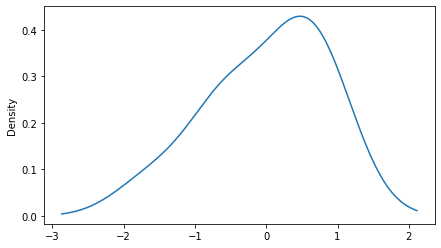

In [50]:
# plot residual
fit_model.resid.plot(kind='kde', figsize=(7,4))

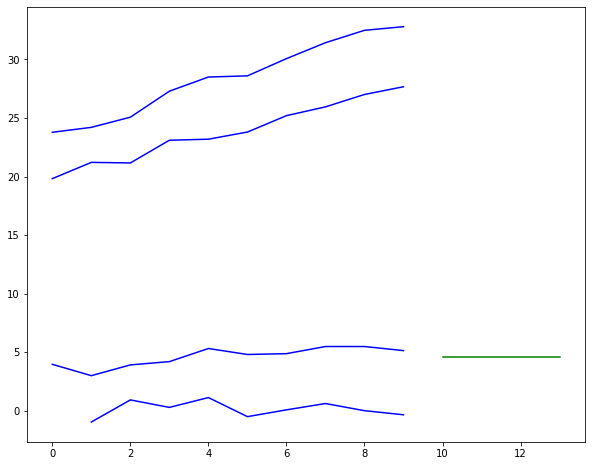

In [51]:
# Visualize the forecasts (blue=train, green=forecasts)
x = np.arange(data.shape[0])
plt.figure(figsize=(10,8))
plt.plot(x[:-4], train_data, c='blue')
plt.plot(x[-4:], pred, c='green')
plt.show()

**Model Evaluation (ARIMA)**

In [66]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

mse1 = mean_squared_error(y_pred=pred, y_true=test_data['wage_gap'])
mape1 = mean_absolute_percentage_error(y_pred=pred, y_true=test_data['wage_gap'])
print('MSE of ARIMA: {}\nMAPE of ARIMA: {}'.format(mse1.round(2), mape1.round(2)))

MSE of ARIMA: 0.16
MAPE of ARIMA: 0.07


**Using the Prophet model**

In [53]:
from prophet import Prophet

In [54]:
# remame the df in an acceptable format
data2 = data.copy().reset_index()
data2 = data2[['year','wage_gap']]
data2.columns = ['ds', 'y']
data2.head()

,ds,y
0,2004-01-01,3.96
1,2005-01-01,2.99
2,2006-01-01,3.91
3,2007-01-01,4.19
4,2008-01-01,5.31


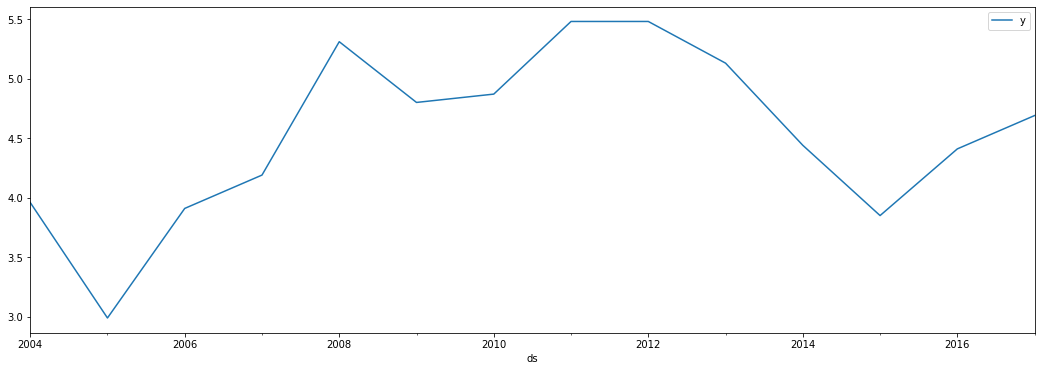

In [55]:
data2.plot(x='ds',y='y',figsize=(18,6))

In [56]:
# split to train and test set
print(data2.shape)
train=data2.iloc[:-4]
test=data2.iloc[-4:]
print(train.shape,test.shape)

(14, 2)
(10, 2) (4, 2)


In [57]:
model2 = Prophet()
model2.fit(train)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 7.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7taluzth/29ozb43d.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7taluzth/c1urvgte.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=59472', 'data', 'file=/tmp/tmp7taluzth/29ozb43d.json', 'init=/tmp/tmp7taluzth/c1urvgte.json', 'output', 'file=/tmp/tmp7taluzth/prophet_model8fivyk1r/prophet_model-20221025163450.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
16:34:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:34:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cm

In [58]:
train


,ds,y
0,2004-01-01,3.96
1,2005-01-01,2.99
2,2006-01-01,3.91
3,2007-01-01,4.19
4,2008-01-01,5.31
5,2009-01-01,4.80
6,2010-01-01,4.87
7,2011-01-01,5.48
8,2012-01-01,5.48
9,2013-01-01,5.13


In [59]:
test

,ds,y
10,2014-01-01,4.44
11,2015-01-01,3.85
12,2016-01-01,4.41
13,2017-01-01,4.69


In [60]:
forecast2 = model2.predict(test.drop(columns='y'))

In [61]:
forecast2[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2014-01-01,5.783785,5.436098,6.117610
1,2015-01-01,6.299222,5.943345,6.670929
2,2016-01-01,6.812452,6.449902,7.162545
3,2017-01-01,6.218613,5.863640,6.580785


In [67]:
# Calculate MSE and MAPE 
mse2 = mean_squared_error(forecast2['yhat'], test.y)
mape2 = mean_absolute_percentage_error(forecast2['yhat'], test.y)
print(f'The MSE value for prophet: {mse2.round(2)}')
print(f'The MAPE value for prophet: {mape2.round(2)}')

The MSE value for prophet: 3.98
The MAPE value for prophet: 0.3


In [68]:
comparison_table = pd.DataFrame({'Models':['ARIMA', 'Prophet'], 'MSE':[mse1.round(2), mse2.round(2)], 'MAPE':[mape1.round(2), mape2.round(2)]})
comparison_table

,Models,MSE,MAPE
0,ARIMA,0.16,0.07
1,Prophet,3.98,0.30


ARIMA seems to be the better model with lower score of MSE and MAPE


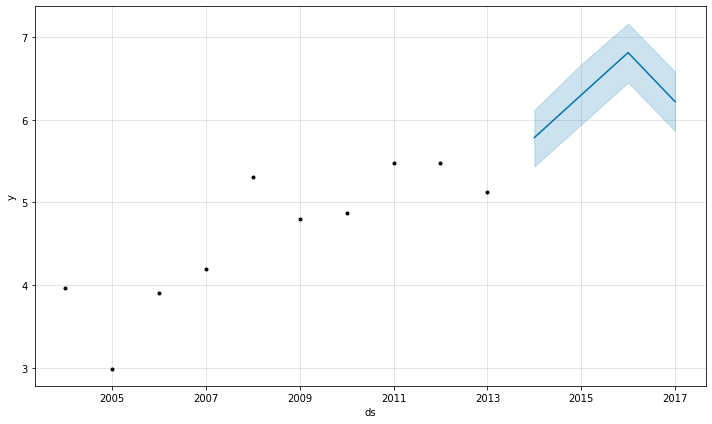

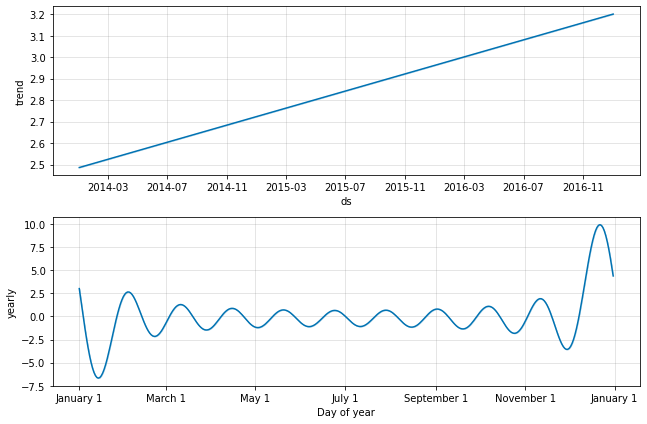

In [64]:
# plot forecast for the test data (prophet model)
model2.plot(forecast2)
model2.plot_components(forecast2)
plt.show()

**Model Evaluation (Prophet)**

In [65]:
# pickle the better model
import pickle
pickle.dump(fit_model, open('model.pkl', 'wb'))